# KNN Classifier Problem
<h3>Predicting whether it will rain,sun,snow,fog or drizzle using differnent features 
on a given day</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



<h3> Loading the dataset and Data exploring  </h3>

In [2]:
df = pd.read_csv('seattle-weather.csv')
df.head() # to see first 5 or only 'df' to see full dataset; df.tail()
#df.info()#check information of the dataset
#df.loc[4]#retrive the features values at row 5
#df.loc[4,'wind'] retrive the feature value at row 5 under coulumn 'wind'
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
del df['date'] # deleting date column since we don't need the feature in the project at all
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [4]:
"""
Useful for Logistic regression to convert each part of date feature 
#converting 'date' cloumn from obj type to datetime type
df['date'] = pd.to_datetime(df['date'])
#df.info()
#print(df['wind']) # df['wind'] # retrive all the values for the given column
#df['wind'][3:7] # print(df['wind'][3:8]) # print range of values
#df
#-------------------------------------------------##
#add dummy variables for exrtacting year,month,day,day_of_year,quarter
df['date_year'] = df['date'].dt.year # extract year
df['date_month'] = df['date'].dt.month
df['date_day'] = df['date'].dt.day
df['day_of_year'] = df['date'].dt.day_of_year
df['quarter'] = df['date'].dt.quarter
df
"""
print(df.shape)#check total row and column number
print(df.isnull().sum()) #check if dataset contains null value(NaN)
print(df.describe())#shows summry of description of the data in the DataFrame
#df.dtypes #shows data types of the features 
 





(1461, 5)
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


In [5]:
df['weather'].value_counts()
#it counts the number of times each unique value appears in the column ‘weather’ of the DataFrame in desencding order

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

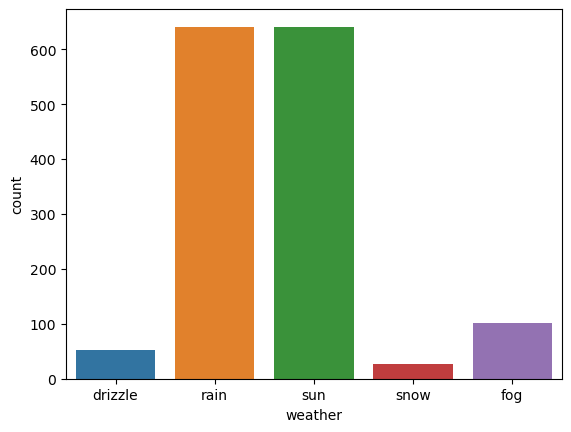

In [6]:
#generates a countplot that displays the count of occurrences for each category 
#in the 'weather' column of the DataFrame
sns.countplot(data=df,x="weather")
plt.show();


<h2>Data Preprocessing</h2> 
<h4>Label Encoder</h4>
Since it is computer can not read string we need to convert the string into number.
So. here target values are string and need to convert to number

In [7]:
data = df.copy() # take a copy of the 'df' dataframe and work on it
data

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


<h3> Encode the label 'weather'</h3>

In [8]:
le = LabelEncoder()

#converting labels or target variables from string to number obj . here 'weather'
label_weather_encode= le.fit_transform(data.weather)
label_weather_encode

array([0, 2, 2, ..., 1, 4, 4])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [10]:
data['weather'] =   label_weather_encode # assign encoded weather integers number obj to original dataframe 
data
data['weather']

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int64

In [11]:
#features = df.drop(['date','weather'], axis=1) # create new data after dropping the selected columnfeatures
features = list(zip(data.precipitation,data.temp_max,data.temp_min,data.wind))# Map the features in a list 
# for each data points 
features


[(0.0, 12.8, 5.0, 4.7),
 (10.9, 10.6, 2.8, 4.5),
 (0.8, 11.7, 7.2, 2.3),
 (20.3, 12.2, 5.6, 4.7),
 (1.3, 8.9, 2.8, 6.1),
 (2.5, 4.4, 2.2, 2.2),
 (0.0, 7.2, 2.8, 2.3),
 (0.0, 10.0, 2.8, 2.0),
 (4.3, 9.4, 5.0, 3.4),
 (1.0, 6.1, 0.6, 3.4),
 (0.0, 6.1, -1.1, 5.1),
 (0.0, 6.1, -1.7, 1.9),
 (0.0, 5.0, -2.8, 1.3),
 (4.1, 4.4, 0.6, 5.3),
 (5.3, 1.1, -3.3, 3.2),
 (2.5, 1.7, -2.8, 5.0),
 (8.1, 3.3, 0.0, 5.6),
 (19.8, 0.0, -2.8, 5.0),
 (15.2, -1.1, -2.8, 1.6),
 (13.5, 7.2, -1.1, 2.3),
 (3.0, 8.3, 3.3, 8.2),
 (6.1, 6.7, 2.2, 4.8),
 (0.0, 8.3, 1.1, 3.6),
 (8.6, 10.0, 2.2, 5.1),
 (8.1, 8.9, 4.4, 5.4),
 (4.8, 8.9, 1.1, 4.8),
 (0.0, 6.7, -2.2, 1.4),
 (0.0, 6.7, 0.6, 2.2),
 (27.7, 9.4, 3.9, 4.5),
 (3.6, 8.3, 6.1, 5.1),
 (1.8, 9.4, 6.1, 3.9),
 (13.5, 8.9, 3.3, 2.7),
 (0.0, 8.3, 1.7, 2.6),
 (0.0, 14.4, 2.2, 5.3),
 (0.0, 15.6, 5.0, 4.3),
 (0.0, 13.9, 1.7, 2.9),
 (0.0, 16.1, 1.7, 5.0),
 (0.3, 15.6, 7.8, 5.3),
 (2.8, 10.0, 5.0, 2.7),
 (2.5, 11.1, 7.8, 2.4),
 (2.5, 12.8, 6.7, 3.0),
 (0.8, 8.9, 5.6, 3.4),
 (1

*****Now we have features and  label as label_weather_encode in numeric formats**

<h3> Scalling the the data points in features </h3>

In [12]:
from sklearn.preprocessing import MinMaxScaler
# Scale the features using MinMaxScaler
scaler = MinMaxScaler() # deafult range (0-1)
scaled_features = scaler.fit_transform(features)
scaled_features


array([[0.        , 0.38709677, 0.47637795, 0.47252747],
       [0.19499106, 0.32795699, 0.38976378, 0.45054945],
       [0.01431127, 0.35752688, 0.56299213, 0.20879121],
       ...,
       [0.        , 0.23655914, 0.30314961, 0.24175824],
       [0.        , 0.19354839, 0.24015748, 0.32967033],
       [0.        , 0.19354839, 0.19685039, 0.34065934]])

# Training the model


#train model without scaling will gave less accurate result as it will pick the higher values
#knnModel.fit(features,label_weather_encode) 
#features are independent variables= x1,x2,..., and label_weather_encode is dependent variable y

<h4> Fit data</h4>

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knnModel= KNeighborsClassifier(n_neighbors=39) # Create a KNN classifier with 39 neighbors, 
# using sqrt of total data points (1461) we choose number of neighbors, always choose odd number
# Train the KNN model with the scaled features
knnModel.fit(scaled_features, label_weather_encode)# here we used all available data-points to train the model
accuracy = knnModel.score(scaled_features, label_weather_encode)#using all data points 
print("Accuracy:", accuracy)

Accuracy: 0.7337440109514032


/Users/data_course/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<h4> prediction </h4>

In [14]:
#------for single input--------

#precipitation - temp_max - temp_min - wind   (Features)
input_data = [[1.0,7.2,-0.6,2.7]]  # List of features as input data
scaled_input_data = scaler.transform(input_data)#Transform the input data using same scaler object 

#prediction
predicted_labels_single = knnModel.predict(scaled_input_data)
print(predicted_labels_single)

#reversing label encoder to show string again
predicted_weather_reverse = le.inverse_transform(predicted_labels_single)
print(predicted_weather_reverse)



[4]
['sun']


/Users/data_course/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
#------for multiple inputs--------

input_data_multi = [
    [0.0, 7.2, -0.6, 2.7],  # Data point 1
    [1.2, 8.5, 2.1, 3.4],  # Data point 2
    [0.5, 6.8, 1.5, 4.1]   # Data point 3
]
scaled_input_data_multi = scaler.transform(input_data_multi)

#prediction
predicted_labels_multi = knnModel.predict(scaled_input_data_multi)#giving the features input
print(predicted_labels_multi)
#reversing label encoder to show string again
predicted_weather_reverse_multi = le.inverse_transform(predicted_labels_multi)
print(predicted_weather_reverse_multi)

for i in range(len(input_data_multi)):
    print("Data Point", i+1)
    print("Input Features:", input_data_multi[i])
    print("Predicted Weather in values :", predicted_labels_multi[i])
    print("Predicted Weather:", predicted_weather_reverse_multi[i])
    print()


[4 2 2]
['sun' 'rain' 'rain']
Data Point 1
Input Features: [0.0, 7.2, -0.6, 2.7]
Predicted Weather in values : 4
Predicted Weather: sun

Data Point 2
Input Features: [1.2, 8.5, 2.1, 3.4]
Predicted Weather in values : 2
Predicted Weather: rain

Data Point 3
Input Features: [0.5, 6.8, 1.5, 4.1]
Predicted Weather in values : 2
Predicted Weather: rain



/Users/data_course/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# train_test_split Method

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split the data into features (X) and labels (y)
X = scaled_features # for better understanding i put it in x and y, features are already scaled before
Y = data['weather']

#Perform train-test split # Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=55)

# Training the KNN model with k-71
knn = KNeighborsClassifier(n_neighbors=71)
knn.fit(X_train, y_train)# train model using training set for both features and label.


KNeighborsClassifier(n_neighbors=71)

In [17]:
"""Checking the accuracy on the testing set is important to assess the model's performance on new, 
unseen data. It helps you understand how well the model has learned patterns from the training set 
and how accurately it can predict on new examples.
"""
# Evaluate the model on the testing set
#calculates the accuracy of the model's predictions by comparing them with the true labels from the testing set
accuracy1 = knn.score(X_test, y_test)
print("Accuracy:", accuracy1)

Accuracy: 0.726962457337884


/Users/data_course/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [18]:
#prediction 
predicted_labels = knn.predict(X_test)#giving the features input
print(predicted_labels)

#reversing label encoder to show string again
predicted_labels_rev = le.inverse_transform(predicted_labels)
print(predicted_labels_rev)



[4 4 2 4 4 4 4 4 2 4 2 2 2 4 2 2 2 4 4 2 4 2 2 4 2 2 2 4 2 4 2 4 4 2 4 4 4
 2 2 2 4 4 4 2 4 2 2 2 2 4 4 2 4 4 4 4 4 2 4 2 4 4 2 4 4 4 2 4 4 4 4 4 4 2
 4 2 2 4 4 2 4 2 4 4 2 4 4 4 2 4 4 4 4 2 2 4 4 4 4 4 2 4 2 2 2 4 4 2 4 2 2
 4 2 4 4 4 2 2 4 4 2 4 2 2 2 2 4 2 4 4 4 2 2 2 2 2 2 4 2 2 4 2 2 2 2 4 2 4
 2 4 4 2 4 4 2 2 4 2 2 2 4 2 2 4 4 2 4 4 4 2 4 4 4 2 2 4 4 4 4 4 4 4 4 4 4
 2 2 2 2 4 2 4 2 4 2 4 4 4 2 4 2 2 2 4 2 4 4 2 2 4 4 2 4 4 4 4 4 4 2 4 2 2
 2 4 2 4 4 2 4 2 2 4 2 2 2 2 4 2 2 4 2 2 2 4 4 2 4 2 4 4 4 4 2 2 4 4 4 4 4
 4 2 4 2 2 2 4 4 4 4 4 2 2 4 2 4 4 2 2 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2]
['sun' 'sun' 'rain' 'sun' 'sun' 'sun' 'sun' 'sun' 'rain' 'sun' 'rain'
 'rain' 'rain' 'sun' 'rain' 'rain' 'rain' 'sun' 'sun' 'rain' 'sun' 'rain'
 'rain' 'sun' 'rain' 'rain' 'rain' 'sun' 'rain' 'sun' 'rain' 'sun' 'sun'
 'rain' 'sun' 'sun' 'sun' 'rain' 'rain' 'rain' 'sun' 'sun' 'sun' 'rain'
 'sun' 'rain' 'rain' 'rain' 'rain' 'sun' 'sun' 'rain' 'sun' 'sun' 'sun'
 'sun' 'sun' 'rain' 'sun' 'rain' 'sun' 'sun'

/Users/data_course/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Using differnt k values

In [19]:

# -----Train the KNN model with k value 27------
knn2 = KNeighborsClassifier(n_neighbors=27)
knn2.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy2 = knn2.score(X_test, y_test)
print("Accuracy:", accuracy2)

#prediction
predicted_labels_2 = knn2.predict(X_test)#This returns an array of predicted values for all datapoints in X_test
print(predicted_labels_2)
print(len(predicted_labels_2))

#reversing label encoder to show string again
predicted_weather_reverse_2 = le.inverse_transform(predicted_labels_2)
print(predicted_weather_reverse_2)


# ---------Train the KNN model k-value 9-------
knn3 = KNeighborsClassifier(n_neighbors=9)
knn3.fit(X_train, y_train)
accuracy3 = knn3.score(X_test, y_test)
print("Accuracy:", accuracy3)

#prediction
predicted_labels_3 = knn3.predict(X_test)
print(predicted_labels_3)
print(len(predicted_labels_3))

#reversing label encoder to show string again
predicted_weather_reverse_3 = le.inverse_transform(predicted_labels_3)
print(predicted_weather_reverse_3)



Accuracy: 0.7098976109215017
[4 4 2 4 4 2 4 4 2 2 2 2 4 4 2 2 2 4 4 2 4 2 2 4 4 2 2 4 2 4 2 4 4 2 4 4 2
 2 2 2 4 4 4 2 4 2 2 2 2 4 4 2 4 4 4 4 4 2 4 2 4 2 2 4 4 4 2 4 4 4 4 4 4 2
 4 2 2 4 4 2 4 2 4 4 2 4 4 4 2 2 4 4 4 2 2 4 4 4 4 4 4 4 2 2 2 4 4 4 4 4 2
 4 2 4 4 4 2 2 4 4 2 4 2 2 2 2 4 4 4 4 4 2 2 2 2 2 2 4 2 2 4 2 2 2 2 4 2 4
 2 4 4 2 4 4 2 2 4 4 2 2 4 2 4 4 4 2 4 4 4 2 4 4 4 2 2 4 4 4 4 4 4 4 4 4 4
 2 2 4 4 4 4 4 4 4 4 4 4 4 2 4 2 2 2 4 2 4 4 2 2 4 2 2 4 4 4 4 4 4 2 4 2 2
 2 4 2 4 4 4 4 2 2 4 2 2 2 2 4 2 2 4 2 2 2 4 4 4 4 2 4 4 4 4 2 2 4 0 4 4 4
 4 2 4 4 2 2 4 4 4 4 4 2 2 4 2 4 4 2 2 2 2 4 4 4 4 4 2 2 4 2 2 4 4 2]
293
['sun' 'sun' 'rain' 'sun' 'sun' 'rain' 'sun' 'sun' 'rain' 'rain' 'rain'
 'rain' 'sun' 'sun' 'rain' 'rain' 'rain' 'sun' 'sun' 'rain' 'sun' 'rain'
 'rain' 'sun' 'sun' 'rain' 'rain' 'sun' 'rain' 'sun' 'rain' 'sun' 'sun'
 'rain' 'sun' 'sun' 'rain' 'rain' 'rain' 'rain' 'sun' 'sun' 'sun' 'rain'
 'sun' 'rain' 'rain' 'rain' 'rain' 'sun' 'sun' 'rain' 'sun' 'sun' 'sun'
 'sun' 'su

/Users/data_course/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/data_course/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

In [20]:
"""A smaller value of k (9) tends to make the model more sensitive to individual data points, 
resulting in overfitting. a larger value of k (e.g., 27) 
may oversmooth the decision boundaries, 
leading to underfitting."""

'A smaller value of k (9) tends to make the model more sensitive to individual data points, \nresulting in overfitting. a larger value of k (e.g., 27) \nmay oversmooth the decision boundaries, \nleading to underfitting.'

# K-fold
The purpose of k-fold cross-validation is to split the data into multiple folds, where each fold is used as both a training and testing set.when using k-fold cross-validation, it is not needed to use train_test_split. The cross-validation process handles the splitting of data.

In [21]:
from sklearn.model_selection import cross_val_score

# Perform k-Fold cross-validation
kfold_scores = cross_val_score(knnModel, scaled_features, data['weather'], cv=5)# features are scaled previously , 5 fold

# k-fold cross-validation returns an array of scores, where each score 
# represents the evaluation metric (such as accuracy) for a particular fold
print("Cross-Validation Scores:", kfold_scores)

#print
print("Mean k-fold", kfold_scores.mean()) # mean of all folds accuracy, for better predictions and optimaization


Cross-Validation Scores: [0.68259386 0.80136986 0.58219178 0.71232877 0.75      ]
Mean k-fold 0.705696853522839


/Users/data_course/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/data_course/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

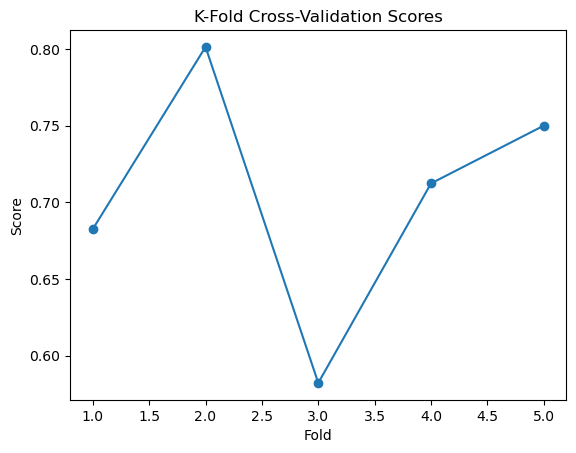

In [22]:
# Visualize the scores
plt.plot(range(1, len(kfold_scores) + 1), kfold_scores, marker='o')
plt.xlabel("Fold")
plt.ylabel("Score")
plt.title("K-Fold Cross-Validation Scores")
plt.show()


In [ ]:
"""
Two real-world scenarios:

1.
Image Recognition: kNN can be used for image recognition tasks by measuring the similarity between images. 
Given a query image, kNN can identify the k most similar images in a labeled dataset, enabling image classification, 
object recognition, or image search applications.
we can identify whether a given picture is cat, dog, birds or others.

2.
Recommend system:
For instance, let's say User A has read and rated several books. To recommend new books to User A, 
we calculate the similarity between User A and other users in the system. 
We identify the k nearest neighbors,which could be Users B, C, and D, based on their similar reading preferences.
We then analyze the books that 
Users B, C, and D have rated highly but User A hasn't read. 
We recommend those books to User A, as they are likely to align with their interests.


""" 

# using KNeighborsRegressor

In [23]:
from sklearn.neighbors import KNeighborsRegressor

# Train the KNN regressor model on the training set
knnReg = KNeighborsRegressor(n_neighbors=37)
knnReg.fit(X_train, y_train)

#below trained KNN regressor model is used to predict the target values for the test set (X_test). 
#The predictions are stored in the knnReg_pred variable
knnReg_pred = knnReg.predict(X_test)
print(y_test)# True y-label for test data
print(knnReg_pred) # Predicted y-label from the model
print(len(knnReg_pred))

""" KNN regressor calculates the average or weighted average of the target 
values of the nearest neighbors and predicts a continuous value accordingly."""

#
error_dis = np.abs(y_test - knnReg_pred)#distance from test labels and  predicted labels
print("Differences between predicted and actual values :", error_dis)

#same as mean absolute error #average absolute difference between the predicted and actual values
print("Mean of errors : ",np.mean(error_dis))

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, knnReg_pred)# by using Default fucntion to calculate mean
print("Mean Absolute Error:", mae)


from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, knnReg_pred)
print("Mean Squared Error:", mse)


573     4
1349    4
75      2
128     4
751     4
       ..
34      4
87      2
267     1
501     1
360     2
Name: weather, Length: 293, dtype: int64
[3.2972973  3.56756757 2.05405405 2.91891892 2.86486486 3.05405405
 2.91891892 3.45945946 2.         2.62162162 2.45945946 2.16216216
 2.35135135 3.43243243 2.40540541 2.         2.35135135 3.02702703
 3.54054054 2.21621622 3.56756757 2.05405405 2.32432432 3.08108108
 2.81081081 2.35135135 2.27027027 3.35135135 2.21621622 2.89189189
 2.32432432 3.24324324 3.37837838 2.2972973  2.59459459 2.97297297
 3.05405405 2.         2.32432432 2.21621622 3.59459459 2.18918919
 3.62162162 1.78378378 3.40540541 2.7027027  2.21621622 2.05405405
 2.40540541 2.83783784 3.13513514 2.16216216 3.24324324 3.13513514
 3.54054054 2.81081081 3.18918919 2.40540541 3.21621622 2.05405405
 3.08108108 2.43243243 2.7027027  2.18918919 3.51351351 2.67567568
 2.08108108 3.40540541 2.94594595 3.48648649 3.18918919 3.13513514
 3.48648649 2.         3.43243243 2.48648649 

In [ ]:
"""mean absolute error (MAE) is 0.809, indicating that, on average, 
the predicted weather values deviate from the true values by approximately 0.809. 
Similarly, the mean squared error (MSE) is 1.083, 
providing a measure of the average squared deviation between the predicted and true weather values.

Lower values for both the mean absolute error (MAE) and mean squared error (MSE) indicate better predictions.

"""
